# Case Studies

## Project: 1
### Week 4

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)

## Preprocessing
### Variable transformation
Evaluate the quadratic nature of the target variable (measured_sysstolic) and transform it to a quadratic form if necessary. If the quadratic nature of the target variable is not significant, then the transformation is not necessary.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from helper_functions import *

In [2]:
# constants

# setting criterion for best subset selection
BEST_SUBSET_CRITERION = "mse"

In [3]:
data_df = read_data()

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Large preprocessing

In [4]:
# variables that are dropped 
to_filter = ["id", "zeit", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "schaetzwert_bp_sys", "schaetzwert_by_dia"]
data_df, cat_feat_list, num_feat_list = format_variables(data_df, to_filter=to_filter, drop_values=True)

# one hot encoding cat variables to prep data for Decision Tree
# ordinal variables and nominal are treated the same in trees, but need to be careful in Lin models

encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14831 entries, 0 to 14830
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   terminal             14831 non-null  object 
 1   bundesland           14831 non-null  object 
 2   befinden             14831 non-null  object 
 3   geschlecht           14831 non-null  object 
 4   raucher              14831 non-null  object 
 5   blutzucker_bekannt   14831 non-null  object 
 6   cholesterin_bekannt  14831 non-null  object 
 7   in_behandlung        14831 non-null  object 
 8   messwert_bp_sys      14831 non-null  float64
 9   messwert_bp_dia      14831 non-null  float64
 10  age                  14831 non-null  int32  
 11  month                14831 non-null  int32  
 12  hour                 14831 non-null  int32  
 13  day                  14831 non-null  int32  
 14  temp                 14831 non-null  float64
 15  humidity             14831 non-null 

In [29]:
data_df.terminal.value_counts()

terminal
3b    10504
3a     4327
Name: count, dtype: int64

In [6]:
# transforming to dummy vars
encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [7]:
print("Size of training data: ", len(encoded_train_set))
print("Size of testing data: ", len(encoded_test_set))
print("Features used: ", data_df.columns)

Size of training data:  10381
Size of testing data:  4450
Features used:  Index(['terminal', 'bundesland', 'befinden', 'geschlecht', 'raucher',
       'blutzucker_bekannt', 'cholesterin_bekannt', 'in_behandlung',
       'messwert_bp_sys', 'messwert_bp_dia', 'age', 'month', 'hour', 'day',
       'temp', 'humidity', 'temp_min', 'temp_max'],
      dtype='object')


### Models for Diastolic as target

In [8]:
target_dia = "messwert_bp_dia"
X_train_dia, Y_train_dia = separate_target(encoded_train_set, target_dia)
X_test_dia, Y_test_dia = separate_target(encoded_test_set, target_dia)

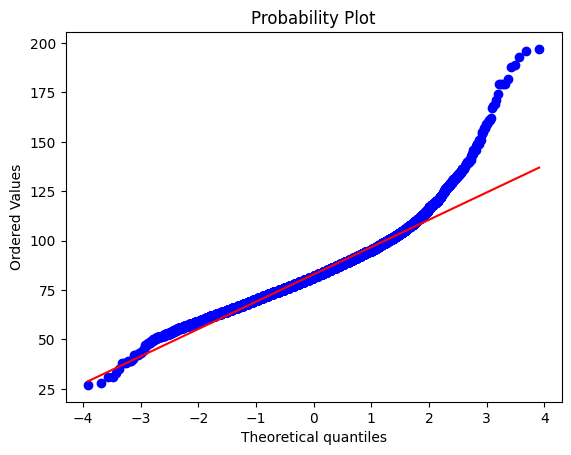

In [9]:
generate_qq_plot(data_df[target_dia])

Base Model

In [10]:
train_results_base_dia, test_results_base_dia, model_base_dia = fit_model(X_train_dia, Y_train_dia, X_test_dia,
                                                                        Y_test_dia, "LinearRegression")
model_base_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     321.0
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        16:49:20   Log-Likelihood:                -38995.
No. Observations:               10381   AIC:                         7.805e+04
Df Residuals:                   10352   BIC:                         7.826e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      28.3527      2.187     12.961      0.000      24.065      32.641
terminal_3b                     2.3430      0.483      4.849      0.000       1.396       3.290
bundesland_Kärnten             -1.2818      1.461     -0.877      0.380      -4.147       1.583
bundesland_Niederösterreich    -0.9604      1.305     -0.736      0.462      -3.518       1.597
bundesland_Oberösterreich      -2.5458      1.441     -1.766      0.077      -5.371       0.280
bundesland_Salzburg            -1.8773      1.799     -1.043      0.297      -5.404       1.649
bundesland_Steiermark          -1.1857      1.166     -1.017      0.309      -3.472       1.101
bundesland_Tirol               -0.5206      1.862     -0.280      0.780      -4.170       3.129
bundesland_Vorarlberg           0.2040      2.460      0.083      0.934      -4.618       5.027
bundesland_Wien                -0.2037      1.290     -0.158      0.875      -2.733       2.326
bundesland_not_applicable      -1.8705      1.401     -1.335      0.182      -4.617       0.876
befinden_2                     -0.6287      0.230     -2.733      0.006      -1.080      -0.178
befinden_3                     -0.5073      0.328     -1.547      0.122      -1.150       0.136
befinden_4                      0.5590      0.929      0.602      0.547      -1.261       2.379
befinden_5                      4.5531      1.676      2.717      0.007       1.268       7.838
geschlecht_m                    1.1980      0.209      5.745      0.000       0.789       1.607
raucher_True                    0.6780      0.284      2.391      0.017       0.122       1.234
blutzucker_bekannt_True        -0.2538      0.287     -0.883      0.377      -0.817       0.310
cholesterin_bekannt_True        0.2009      0.267      0.753      0.451      -0.322       0.724
in_behandlung_True             -1.5470      0.328     -4.715      0.000      -2.190      -0.904
messwert_bp_sys                 0.5176      0.006     89.819      0.000       0.506       0.529
age                            -0.0795      0.007    -10.846      0.000      -0.094      -0.065
month                          -1.2947      0.133     -9.699      0.000      -1.556      -1.033
hour                           -0.0703      0.046     -1.529      0.126      -0.161       0.020
day                            -0.0654      0.012     -5.410      0.000      -0.089      -0.042
temp                            0.3917      0.148      2.653      0.008       0.102       0.681
humidity                        0.0565      0.015      3.845      0.000       0.028       0.085
temp_min                       -0.0812      0.097     -0.841      0.400      -0.270       0.108
temp_max                       -0.2413      0.073     -3.310      0.001      -0.384      -0.098
===========

In [11]:
print(model_base_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      28.3527  &        2.187     &    12.961  &         0.000        &       24.065    &       32.641     \\
\textbf{terminal\_3b}                 &       2.3430  &        0.483     &     4.849  &         0.000        &        1.396    &        3.290     \\
\textbf{bundesland\_Kärnten}          &      -1.2818  &        1.461     &    -0.877  &         0.380        &       -4.147    &        1.583     \\
\textbf{bundesland\_Niederösterreich} &      -0.9604  &        1.305     &    -0.736  &         0.462        &       -3.518    &        1.597     \\
\textbf{bundesland\_Oberösterreich}   &      -2.5458  &        1.441     &    -1.766  &         0.077        &       -5.371    &        0.280     \\
\textbf{bundesland\_Salzburg}         &      -1.8

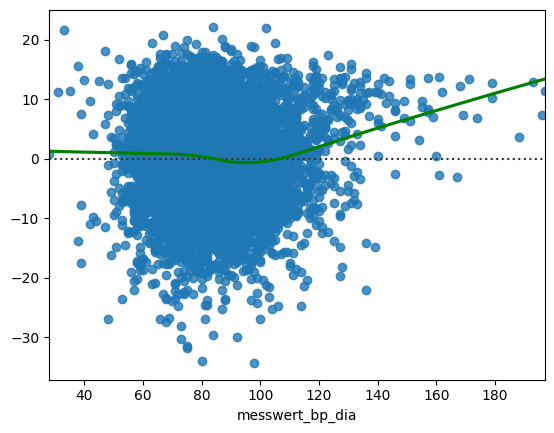

In [12]:
generate_residual_plot(Y_train_dia, model_base_dia)

Best Subset

In [13]:
model_type = "LinearRegression"
features = list(X_train_dia.columns)
model_best_dia, test_results_best_dia, train_results_best_dia = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_dia, Y_train_dia, X_test_dia, Y_test_dia,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'messwert_bp_sys', 'age', 'month', 'hour', 'day', 'temp', 'humidity', 'temp_min', 'temp_max']
Train Results:  {'r_2': 0.4630769726479832, 'adjusted_r_2': 0.4621442748587209, 'mse': 107.55642675060668}
Test Results:  {'r_2': 0.4525861037069854, 'adjusted_r_2': 0.4503623505737707, 'mse': 110.93739159676198}


In [14]:
model_best_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     496.5
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        16:49:34   Log-Likelihood:                -39011.
No. Observations:               10381   AIC:                         7.806e+04
Df Residuals:                   10362   BIC:                         7.820e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   24.5607      1.762     13.937      0.000      21.106      28.015
befinden_2                  -0.6371      0.230     -2.769      0.006      -1.088      -0.186
befinden_3                  -0.5524      0.328     -1.684      0.092      -1.195       0.091
befinden_4                   0.5914      0.928      0.637      0.524      -1.228       2.411
befinden_5                   4.5220      1.675      2.700      0.007       1.239       7.806
geschlecht_m                 1.1864      0.209      5.688      0.000       0.778       1.595
raucher_True                 0.6427      0.284      2.267      0.023       0.087       1.199
blutzucker_bekannt_True     -0.2453      0.287     -0.854      0.393      -0.808       0.318
cholesterin_bekannt_True     0.1956      0.267      0.734      0.463      -0.327       0.718
in_behandlung_True          -1.5222      0.328     -4.639      0.000      -2.165      -0.879
messwert_bp_sys              0.5172      0.006     89.704      0.000       0.506       0.529
age                         -0.0782      0.007    -10.667      0.000      -0.093      -0.064
month                       -0.7368      0.069    -10.625      0.000      -0.873      -0.601
hour                        -0.0732      0.046     -1.593      0.111      -0.163       0.017
day                         -0.0632      0.012     -5.235      0.000      -0.087      -0.040
temp                         0.4059      0.148      2.749      0.006       0.116       0.695
humidity                     0.0485      0.015      3.323      0.001       0.020       0.077
temp_min                     0.0102      0.095      0.108      0.914      -0.175       0.196
temp_max                    -0.2656      0.073     -3.651      0.000      -0.408      -0.123
==============================================================================
Omnibus:                     1284.936   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4242.340
Skew:                           0.628   Prob(JB):                         0.00
Kurtosis:                       5.869   Cond. No.                     2.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
print(model_best_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                    & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                  &      24.5607  &        1.762     &    13.937  &         0.000        &       21.106    &       28.015     \\
\textbf{befinden\_2}                &      -0.6371  &        0.230     &    -2.769  &         0.006        &       -1.088    &       -0.186     \\
\textbf{befinden\_3}                &      -0.5524  &        0.328     &    -1.684  &         0.092        &       -1.195    &        0.091     \\
\textbf{befinden\_4}                &       0.5914  &        0.928     &     0.637  &         0.524        &       -1.228    &        2.411     \\
\textbf{befinden\_5}                &       4.5220  &        1.675     &     2.700  &         0.007        &        1.239    &        7.806     \\
\textbf{geschlecht\_m}              &       1.1864  &        

In [16]:
train_result_list = [train_results_base_dia, train_results_best_dia]

test_result_list = [test_results_base_dia, test_results_best_dia]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),107.223,110.876,0.465,0.453,0.463,0.449
1,LM (Best Subset),110.937,107.556,0.453,0.463,0.450,0.462


In [17]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 107.222819 & 110.875824 & 0.464742 & 0.452890 & 0.463295 & 0.449425 \\
1 & LM (Best Subset) & 110.937392 & 107.556427 & 0.452586 & 0.463077 & 0.450362 & 0.462144 \\
\bottomrule
\end{tabular}



### Models for Systolic as target

In [18]:
target_sys = "messwert_bp_sys"
X_train_sys, Y_train_sys = separate_target(encoded_train_set, target_sys)
X_test_sys, Y_test_sys = separate_target(encoded_test_set, target_sys)

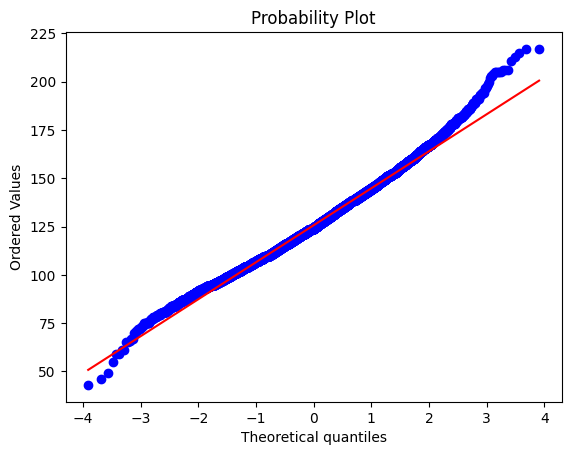

In [19]:
generate_qq_plot(data_df[target_sys])

Base Model

In [20]:
train_results_base_sys, test_results_base_sys, model_base_sys = fit_model(X_train_sys, Y_train_sys, X_test_sys,
                                                                        Y_test_sys, "LinearRegression")
model_base_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     414.6
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        16:49:34   Log-Likelihood:                -41546.
No. Observations:               10381   AIC:                         8.315e+04
Df Residuals:                   10352   BIC:                         8.336e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      41.6881      2.790     14.944      0.000      36.220      47.156
terminal_3b                    -2.5465      0.618     -4.121      0.000      -3.758      -1.335
bundesland_Kärnten              1.0221      1.869      0.547      0.584      -2.641       4.685
bundesland_Niederösterreich     0.4659      1.668      0.279      0.780      -2.805       3.736
bundesland_Oberösterreich       1.8669      1.843      1.013      0.311      -1.746       5.480
bundesland_Salzburg            -0.9449      2.300     -0.411      0.681      -5.454       3.564
bundesland_Steiermark           0.6957      1.491      0.466      0.641      -2.228       3.619
bundesland_Tirol               -2.5871      2.380     -1.087      0.277      -7.253       2.079
bundesland_Vorarlberg          -3.0195      3.145     -0.960      0.337      -9.185       3.146
bundesland_Wien                -0.0926      1.650     -0.056      0.955      -3.327       3.142
bundesland_not_applicable       0.9824      1.792      0.548      0.584      -2.530       4.495
befinden_2                      0.5678      0.294      1.930      0.054      -0.009       1.144
befinden_3                      0.1777      0.419      0.424      0.672      -0.644       1.000
befinden_4                     -0.7314      1.187     -0.616      0.538      -3.059       1.596
befinden_5                     -0.3676      2.144     -0.171      0.864      -4.569       3.834
geschlecht_m                    1.7146      0.267      6.433      0.000       1.192       2.237
raucher_True                   -0.8381      0.363     -2.311      0.021      -1.549      -0.127
blutzucker_bekannt_True         1.1051      0.367      3.008      0.003       0.385       1.825
cholesterin_bekannt_True       -0.6971      0.341     -2.044      0.041      -1.366      -0.029
in_behandlung_True              6.0112      0.416     14.458      0.000       5.196       6.826
messwert_bp_dia                 0.8462      0.009     89.819      0.000       0.828       0.865
age                             0.2371      0.009     25.959      0.000       0.219       0.255
month                           1.4804      0.171      8.666      0.000       1.146       1.815
hour                           -0.1083      0.059     -1.841      0.066      -0.224       0.007
day                             0.1119      0.015      7.250      0.000       0.082       0.142
temp                           -0.1532      0.189     -0.811      0.417      -0.523       0.217
humidity                       -0.0612      0.019     -3.261      0.001      -0.098      -0.024
temp_min                       -0.3525      0.123     -2.858      0.004      -0.594      -0.111
temp_max                        0.0800      0.093      0.858      0.391      -0.103       0.263
===========

In [21]:
print(model_base_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      41.6881  &        2.790     &    14.944  &         0.000        &       36.220    &       47.156     \\
\textbf{terminal\_3b}                 &      -2.5465  &        0.618     &    -4.121  &         0.000        &       -3.758    &       -1.335     \\
\textbf{bundesland\_Kärnten}          &       1.0221  &        1.869     &     0.547  &         0.584        &       -2.641    &        4.685     \\
\textbf{bundesland\_Niederösterreich} &       0.4659  &        1.668     &     0.279  &         0.780        &       -2.805    &        3.736     \\
\textbf{bundesland\_Oberösterreich}   &       1.8669  &        1.843     &     1.013  &         0.311        &       -1.746    &        5.480     \\
\textbf{bundesland\_Salzburg}         &      -0.9

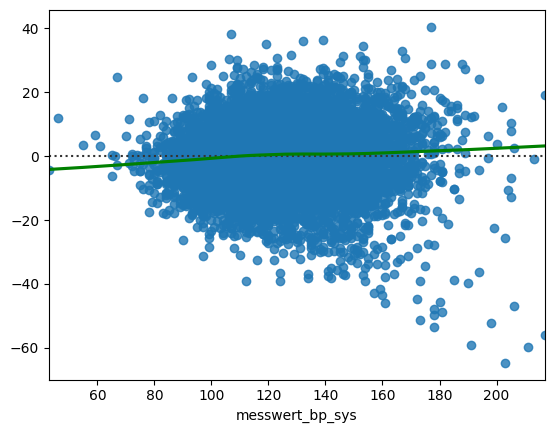

In [22]:
generate_residual_plot(Y_train_sys, model_base_sys)

Base Best Subset

In [23]:
model_type = "LinearRegression"
features = list(X_train_sys.columns)
model_best_sys, test_results_best_sys, train_results_best_sys = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_sys, Y_train_sys, X_test_sys, Y_test_sys,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['terminal_3b', 'bundesland_Kärnten', 'bundesland_Niederösterreich', 'bundesland_Oberösterreich', 'bundesland_Salzburg', 'bundesland_Steiermark', 'bundesland_Tirol', 'bundesland_Vorarlberg', 'bundesland_Wien', 'bundesland_not_applicable', 'befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'messwert_bp_dia', 'age', 'month', 'hour', 'day', 'temp', 'humidity']
Train Results:  {'r_2': 0.5279133881365772, 'adjusted_r_2': 0.5267279282265473, 'mse': 175.55204600777122}
Test Results:  {'r_2': 0.5227687645469654, 'adjusted_r_2': 0.5199634260613721, 'mse': 174.58469972435438}


In [24]:
model_best_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     445.3
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        16:49:48   Log-Likelihood:                -41554.
No. Observations:               10381   AIC:                         8.316e+04
Df Residuals:                   10354   BIC:                         8.336e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      45.6451      2.593     17.605      0.000      40.563      50.727
terminal_3b                    -3.2170      0.594     -5.413      0.000      -4.382      -2.052
bundesland_Kärnten              1.1857      1.869      0.634      0.526      -2.479       4.850
bundesland_Niederösterreich     0.4922      1.670      0.295      0.768      -2.780       3.765
bundesland_Oberösterreich       1.8591      1.844      1.008      0.313      -1.756       5.474
bundesland_Salzburg            -1.0343      2.302     -0.449      0.653      -5.546       3.478
bundesland_Steiermark           0.6984      1.492      0.468      0.640      -2.227       3.624
bundesland_Tirol               -2.6580      2.382     -1.116      0.264      -7.327       2.011
bundesland_Vorarlberg          -2.9528      3.147     -0.938      0.348      -9.121       3.215
bundesland_Wien                -0.0860      1.651     -0.052      0.958      -3.322       3.150
bundesland_not_applicable       1.0189      1.793      0.568      0.570      -2.496       4.534
befinden_2                      0.5729      0.294      1.946      0.052      -0.004       1.150
befinden_3                      0.1635      0.420      0.390      0.697      -0.659       0.986
befinden_4                     -0.7528      1.188     -0.634      0.526      -3.082       1.576
befinden_5                     -0.2186      2.145     -0.102      0.919      -4.422       3.985
geschlecht_m                    1.7100      0.267      6.412      0.000       1.187       2.233
raucher_True                   -0.8135      0.363     -2.242      0.025      -1.525      -0.102
blutzucker_bekannt_True         1.1217      0.368      3.052      0.002       0.401       1.842
cholesterin_bekannt_True       -0.7090      0.341     -2.078      0.038      -1.378      -0.040
in_behandlung_True              6.0305      0.416     14.496      0.000       5.215       6.846
messwert_bp_dia                 0.8466      0.009     89.884      0.000       0.828       0.865
age                             0.2370      0.009     25.939      0.000       0.219       0.255
month                           1.7140      0.158     10.841      0.000       1.404       2.024
hour                           -0.1161      0.059     -1.976      0.048      -0.231      -0.001
day                             0.1204      0.015      8.015      0.000       0.091       0.150
temp                           -0.3800      0.040     -9.617      0.000      -0.457      -0.303
humidity                       -0.1080      0.014     -7.480      0.000      -0.136      -0.080
==============================================================================
Omnibus:                      108.188   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarqu

In [25]:
print(model_best_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      45.6451  &        2.593     &    17.605  &         0.000        &       40.563    &       50.727     \\
\textbf{terminal\_3b}                 &      -3.2170  &        0.594     &    -5.413  &         0.000        &       -4.382    &       -2.052     \\
\textbf{bundesland\_Kärnten}          &       1.1857  &        1.869     &     0.634  &         0.526        &       -2.479    &        4.850     \\
\textbf{bundesland\_Niederösterreich} &       0.4922  &        1.670     &     0.295  &         0.768        &       -2.780    &        3.765     \\
\textbf{bundesland\_Oberösterreich}   &       1.8591  &        1.844     &     1.008  &         0.313        &       -1.756    &        5.474     \\
\textbf{bundesland\_Salzburg}         &      -1.0

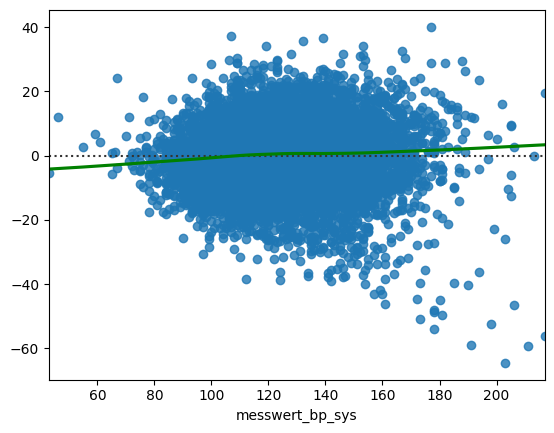

In [26]:
generate_residual_plot(Y_train_sys, model_best_sys)

In [27]:
train_result_list = [train_results_base_sys, train_results_best_sys]

test_result_list = [test_results_base_sys, test_results_best_sys]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),175.291,174.819,0.529,0.522,0.527,0.519
1,LM (Best Subset),174.585,175.552,0.523,0.528,0.520,0.527


In [28]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 175.290635 & 174.819288 & 0.528616 & 0.522128 & 0.527341 & 0.519101 \\
1 & LM (Best Subset) & 174.584700 & 175.552046 & 0.522769 & 0.527913 & 0.519963 & 0.526728 \\
\bottomrule
\end{tabular}

